In [6]:
pip install matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install matplotlib


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest

Accuracy: 0.95


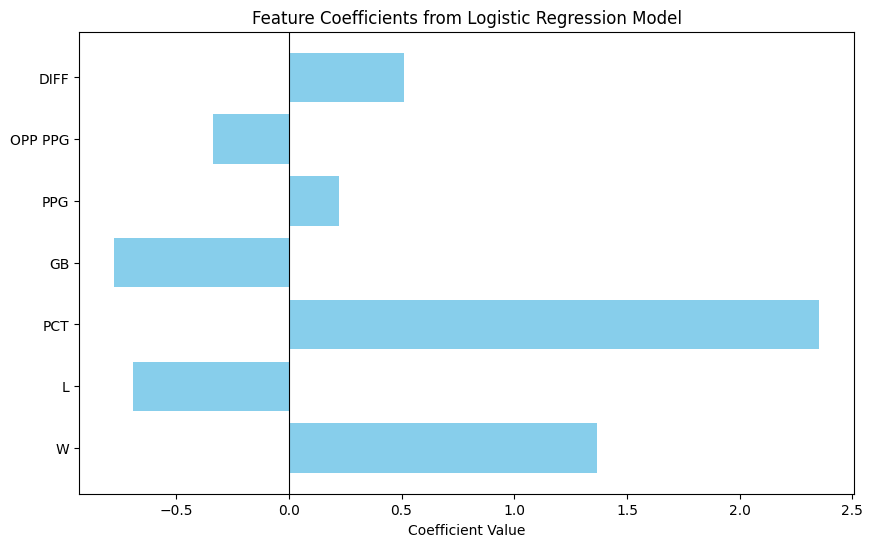

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest

# Load the dataset
data = pd.read_csv('all_nba_standing_2021-2025.csv')

# Preprocess the dataset
data.dropna(inplace=True)  # Remove rows with missing values

# Select features for the model
features = [
    'W', 'L', 'PCT', 'GB'
 , 'PPG', 'OPP PPG', 'DIFF'
]

# Convert features to numeric, forcing errors to NaN
X = data[features].apply(pd.to_numeric, errors='coerce')

# Optional: Fill NaN values with a specific value or drop them
X.fillna(0, inplace=True)  # Replace NaN with 0
# or
# X.dropna(inplace=True)  # Drop rows with NaN values

# Target variable (for simplicity, let's say we want to predict if a team is likely to win)
data['target'] = np.where(data['W'] > data['L'], 1, 0)  # 1 if wins > losses, else 0
y = data['target']

# Detect and remove outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.1)  # Adjust contamination as needed
outliers = iso_forest.fit_predict(X)
X = X[outliers != -1]
y = y[outliers != -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict the outcomes
predictions = model.predict(X_test_scaled)

# Print accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Get feature coefficients
coefficients = model.coef_[0]
features = X.columns

# Visualize feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients from Logistic Regression Model')
plt.axvline(0, color='black', lw=0.8)
plt.show()